# **Yelp Reviews Analysis: Exploring User Trends, Business Insights, and Reviewer Behaviors**

## **Introduction**
Analyzing customer reviews is a powerful way to uncover trends, behaviors, and insights that can drive business decisions. This project explores a Yelp Reviews dataset to understand patterns in reviewer behavior, business ratings, and voting metrics. By transforming and analyzing the data, I aim to answer several key questions and create features that provide actionable insights.

## **Dataset**

- **Source**: Yelp Reviews Dataset (Kaggle/Provided dataset).
- **Description**: Contains 547,273 rows of reviews, each representing a user’s interaction with a business. Features include:
  - Reviewer details
  - Business ratings
  - Textual review content
  - Voting metrics (cool, funny, useful votes)







## **Table of Contents**
1. [Asking Questions](#asking-questions)
2. [Data Wrangling](#data-wrangling)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
4. [Feature Engineering](#feature-engineering)
5. [Conclusion](#conclusion)

# **1. Asking Questions**
Key questions we aim to answer:
- What was the highest number of reviews for any single business?
- What is the average number of reviews per business?
- What is the average number of reviews per reviewer?
- How do voting metrics (cool, funny, useful) relate to reviewer activity?
- What trends can be observed from review text lengths and patterns?
- Can we extract a new feature that captures time since the last review for each reviewer?


# **2. Data Wrangling**

### **2.1 Loading the Data**


We will prepare the environment, load and assess dataset. Subsequently, we also clean and process the data for analysis.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

# Mount to Google Drive and Load dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dataset/yelp_reviews.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2.2 Assessing the Data**

In this step, we view the dataset and get basic information.


In [ ]:
# Viewing the first few rows
df

,type,business_id,user_id,stars,text,date,cool_votes,useful_votes,funny_votes
0,review,mxrXVZWc6PWk81gvOVNOUw,mv7shusL4Xb6TylVYBv4CA,4,Definitely try the duck dish. I rank it amon...,2011-06-13,0,0,0
1,review,mxrXVZWc6PWk81gvOVNOUw,0aN5QPhs-VwK2vusKG0waQ,5,Big Ass Burger was awesome! Great $5 mojitos. ...,2011-06-25,1,0,0
2,review,kK4AzZ0YWI-U2G-paAL7Fg,0aN5QPhs-VwK2vusKG0waQ,5,Unbelievable sandwiches! Good service.,2011-06-25,0,0,0
3,review,mxrXVZWc6PWk81gvOVNOUw,1JUwyYab-uJzEx_FRd81Zg,5,"Awesome, awesome, awesome! My mom and sister a...",2011-07-18,1,1,0
4,review,mxrXVZWc6PWk81gvOVNOUw,2Zd3Xy8hUVmZkNg7RyNjhg,4,I had the ribs they were great. The beer sele...,2011-07-19,1,0,1
...,...,...,...,...,...,...,...,...,...
547268,review,uJYw4p59AKh8c8h5yWMdOw,RbfDvjqqzzqT-ipvWWyPTg,2,Non smoking hotel room reeked of smoking.\nCar...,2016-07-06,0,1,0
547269,review,uJYw4p59AKh8c8h5yWMdOw,2K6zSLJy-zxLB7sqONfGvQ,3,Great location right on the strip but I defini...,2016-07-08,0,1,1
547270,review,9CLZ-Uwv3nmOlbbGCIhvrQ,2K6zSLJy-zxLB7sqONfGvQ,3,If you're staying in Planet Hollywood and look...,2016-07-08,0,1,0
547271,review,aGbjLWzcrnEx2ZmMCFm3EA,2K6zSLJy-zxLB7sqONfGvQ,4,I'm not a huge burger person but got dragged i...,2016-07-08,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547273 entries, 0 to 547272
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   type          547273 non-null  object
 1   business_id   547273 non-null  object
 2   user_id       547273 non-null  object
 3   stars         547273 non-null  int64 
 4   text          547273 non-null  object
 5   date          547273 non-null  object
 6   cool_votes    547273 non-null  int64 
 7   useful_votes  547273 non-null  int64 
 8   funny_votes   547273 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 37.6+ MB


In [ ]:
df.describe()

,stars,cool_votes,useful_votes,funny_votes
count,547270.000000,547270.000000,547270.000000,547270.000000
mean,3.722550,0.389440,0.779200,0.345387
std,1.433355,1.649075,2.027461,1.573528
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,0.000000,1.000000,0.000000
max,5.000000,153.000000,168.000000,151.000000


Here we observe that the majority of reviews are positive, with an average rating of 3.72. Half of all reviews are rated 4 or higher, and the majority (75%) of reviews are rated 3 to 5 stars. Very few reviews have a rating below 3

Notice that while the majority of reviews don’t receive any votes (cool, useful, or funny), a small percentage of reviews attract significant attention and engagement, creating large variability in the voting metrics.

For example: on average of, a review receives 0.78 "useful" votes which is slightly higher compared to other types of votes, but similar to cool or funny votes, most reviews (75%) don’t get any useful votes. Though a few reviews receive a large number, up to 168.

### **2.3 Handle Duplicates**

In [ ]:
# Check for duplicates
df.duplicated().sum()

3

As there is only 3 duplicated row, we drop the row.

In [ ]:
# Drop row and set inplace to True to reflect changes in dataset
df.drop_duplicates(inplace=True)

### **2.4** Handle Missing Values

Using percentage to find missing values would give a clearer representation of the missing values in the dataset.

In [ ]:
# Find percentage of null values
df.isnull().sum()/len(df)*100

,0
type,0.0
business_id,0.0
user_id,0.0
stars,0.0
text,0.0
date,0.0
cool_votes,0.0
useful_votes,0.0
funny_votes,0.0


# **3. Exploratory Data Analysis (EDA)**

### **3.1 Question 1: What was the highest number of reviews for any one business?**

In [ ]:
business_review_counts = df.groupby('business_id').size()
most_reviews = business_review_counts.max()
print(f"Highest number of reviews for a single business: {most_reviews}")

Highest number of reviews for a single business: 4128


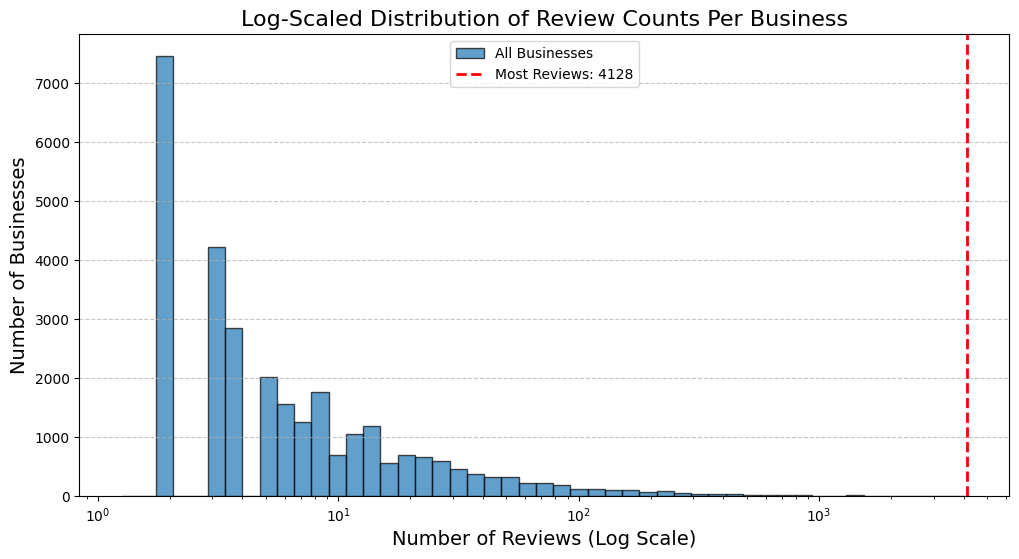

In [ ]:
# Histogram: Distribution of review counts per business
plt.figure(figsize=(12, 6))
plt.hist(business_review_counts, bins=np.logspace(0.1, np.log10(business_review_counts.max()), 50),
         edgecolor='black', alpha=0.7, label="All Businesses")

# Set log scale for x-axis
plt.xscale('log')

# Add labels, title, and legend
plt.title("Log-Scaled Distribution of Review Counts Per Business", fontsize=16)
plt.xlabel("Number of Reviews (Log Scale)", fontsize=14)
plt.ylabel("Number of Businesses", fontsize=14)
plt.axvline(x=most_reviews, color='red', linestyle='dashed', linewidth=2, label=f"Most Reviews: {most_reviews}")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **3.2 Question 2: Average number of reviews per business**

In [ ]:
avg_reviews_per_business = df.groupby('business_id').size().mean()
print(f"Average reviews per business: {avg_reviews_per_business:.2f}")

Average reviews per business: 12.63


### **3.3 Question 3: Average number of reviews per reviewer**

In [ ]:
avg_reviews_per_reviewer = df.groupby('user_id').size().mean()
print(f"Average reviews per reviewer: {avg_reviews_per_reviewer:.2f}")

Average reviews per reviewer: 3.19


### **3.4 Voting Metrics Analysis**

Total and Average of Cool, Funny, Useful Votes per reviewer:

In [ ]:
avg_cool_votes = df.groupby('user_id')['cool_votes'].sum().mean()
avg_funny_votes = df.groupby('user_id')['funny_votes'].sum().mean()
avg_useful_votes = df.groupby('user_id')['useful_votes'].sum().mean()

print(f"Average cool votes per reviewer: {avg_cool_votes:.2f}")
print(f"Average funny votes per reviewer: {avg_funny_votes:.2f}")
print(f"Average useful votes per reviewer: {avg_useful_votes:.2f}")

Average cool votes per reviewer: 1.24
Average funny votes per reviewer: 1.10
Average useful votes per reviewer: 2.48


### **3.5 Review Text Length Analysis**

In [ ]:
avg_text_length = df['text'].str.replace(' ', '').str.len().mean()
print(f"Average review text length: {avg_text_length:.0f} characters (non-space)")

Average review text length: 499 characters (non-space)


### **3.6 Percentage of Reviewer's vote on average**

In [ ]:
def calculate_average_cool_vote_percentage(df):
    valid_df = df[(df['funny_votes'] != 0) | (df['useful_votes'] != 0) | (df['cool_votes'] != 0)]
    grouped = valid_df.groupby('user_id').sum(numeric_only=True)
    grouped['total_votes'] = grouped['cool_votes'] + grouped['useful_votes'] + grouped['funny_votes']
    grouped['cool_votes_percentage'] = grouped['cool_votes'] / grouped['total_votes']
    return grouped['cool_votes_percentage'].mean() * 100

def calculate_average_funny_vote_percentage(df):
    valid_df = df[(df['funny_votes'] != 0) | (df['useful_votes'] != 0) | (df['cool_votes'] != 0)]
    grouped = valid_df.groupby('user_id').sum(numeric_only=True)
    grouped['total_votes'] = grouped['cool_votes'] + grouped['useful_votes'] + grouped['funny_votes']
    grouped['funny_votes_percentage'] = grouped['funny_votes'] / grouped['total_votes']
    return grouped['funny_votes_percentage'].mean() * 100

def calculate_average_useful_vote_percentage(df):
    valid_df = df[(df['funny_votes'] != 0) | (df['useful_votes'] != 0) | (df['cool_votes'] != 0)]
    grouped = valid_df.groupby('user_id').sum(numeric_only=True)
    grouped['total_votes'] = grouped['cool_votes'] + grouped['useful_votes'] + grouped['funny_votes']
    grouped['useful_votes_percentage'] = grouped['useful_votes'] / grouped['total_votes']
    return grouped['useful_votes_percentage'].mean() * 100

print("Q7: Average percentage of cool votes:", round(calculate_average_cool_vote_percentage(df), 2))
print("Q8: Average percentage of funny votes:", round(calculate_average_funny_vote_percentage(df), 2))
print("Q9: Average percentage of useful votes:", round(calculate_average_useful_vote_percentage(df), 2))

Q7: Average percentage of cool votes: 19.27
Q8: Average percentage of funny votes: 18.26
Q9: Average percentage of useful votes: 62.47


# **4. Feature Engineering**

Transforming the data to uncover deeper insights and improve analysis

### **4.1 New Feature: Time Since Last Review**

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['days_since_last_review'] = df.groupby('user_id')['date'].diff().fillna(pd.Timedelta(0)).abs()
df.describe()

,stars,date,cool_votes,useful_votes,funny_votes,review_length,days_since_last_review
count,547273.000000,547273,547273.000000,547273.000000,547273.000000,547273.000000,547273
mean,3.722555,2013-12-17 17:14:14.142630912,0.389438,0.779196,0.345385,613.051581,165 days 23:35:06.830777324
min,1.000000,2004-10-12 00:00:00,0.000000,0.000000,0.000000,1.000000,0 days 00:00:00
25%,3.000000,2012-08-21 00:00:00,0.000000,0.000000,0.000000,234.000000,0 days 00:00:00
50%,4.000000,2014-07-19 00:00:00,0.000000,0.000000,0.000000,431.000000,1 days 00:00:00
75%,5.000000,2015-08-26 00:00:00,0.000000,1.000000,0.000000,781.000000,183 days 00:00:00
max,5.000000,2016-07-19 00:00:00,153.000000,168.000000,151.000000,5000.000000,3586 days 00:00:00
std,1.433353,NaN,1.649071,2.027456,1.573524,589.743523,332 days 01:07:45.267163940


Here we learn about the frequent reviewing behavior where 25% of reviews were written on the same day as the previous review. These users are likely to review multiple businesses in quick succession, possibly after a single outing or during a focused period of review writing.


There is also a 50% active engagement of reviews written within 1 day of the previous review, suggesting that the majority of reviewers are highly engaged within short timeframes. This could reflect users reviewing businesses they interact with consecutively, such as during travel, dining out, or shopping sprees.

### **4.2 Reviewer Activity Patterns**

Identify the year and reviewer with the most reviews:

In [ ]:
# Group by user_id and year, count reviews
reviews_per_year = df.groupby(['user_id', 'year']).size().reset_index(name='review_count')
# Find the year with the most reviews for each user_id
most_reviews_year = reviews_per_year.loc[reviews_per_year.groupby('user_id')['review_count'].idxmax()].sort_values(by='review_count', ascending=False)
most_reviews_year

,user_id,year,review_count
106670,QYS29txRosYV2mGu68Cnhg,2010,347
161104,dhVuDuzCimescgn83tWQOA,2012,114
34912,86EnhYP1N8VFmHyON_TcJA,2015,96
138403,YlpzPPySUxJsUJHRyRde8A,2011,86
35061,88OFCnILjT5vi2DhWX6rew,2016,76
...,...,...,...
110970,ReFYlmhRfhrmb9Gtmy7IqQ,2016,1
110969,Re9KtRl043dvMgNXBQeNZQ,2009,1
110968,Re9GM-NSwLv5z3S2Xqpkng,2015,1
110967,Re7nzbbHcWbTnssa3-198g,2015,1


# **Conclusion**

Let us revisit the questions and summarize our conclusions.

Q1: What was the highest number of reviews for any single business?

**The highest number of reviews for a single business is 4,128.**

Q2: What is the average number of reviews per business?

**On average, businesses have 12.63 reviews.**

Q3: What is the average number of reviews per reviewer?

**The average number of reviews per reviewer is 3.19.**

Q4: How do voting metrics (cool, funny, useful) relate to reviewer activity?

**"Useful" votes are the most common, averaging 2.48 per reviewer, followed by "cool" (1.24) and "funny" (1.10) votes. This indicates that practical feedback is valued more than entertaining or relatable content.**

Q5: What trends can be observed from review text lengths and patterns?

**The average review contains 499 non-space characters, highlighting that most reviews are moderately detailed.**

Q6: Can we extract a new feature that captures time since the last review for each reviewer?

**Yes, the "time since last review" feature shows that 50% of reviews are written within one day of the previous review, suggesting that many users review businesses consecutively.**

Q7: What is the average percentage of "cool," "funny," and "useful" votes among all votes?

  **"Useful" votes make up the majority (62.47%), followed by "cool" (19.27%) and "funny" (18.26%) votes.**


In conclusion, reviewer behavior on Yelp reveals interesting trends, such as the dominance of positive reviews, the importance of "useful" feedback, and patterns of active engagement. These insights suggest that businesses can enhance their visibility and reputation by encouraging detailed and practical reviews from their customers.

